In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
file_list = ["gpt-3.5-1.csv", "gpt-3.5-2.csv", "gpt-3.5-3.csv"]

In [44]:
dfs = []

for csv_file in file_list:
    df = pd.read_csv(csv_file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

grouped_df = merged_df.groupby('GitHub_Repo_Link')

In [45]:
# Calculate average for specific columns within each group
columns_to_average = ['Exact_Match_Score', 'BLEU_Score', 'DevOps_Aware_Score']
averages = grouped_df[columns_to_average].mean()

# Add a new column for Syntax_Check counts
merged_df['Syntax_Check_Count_Valid'] = merged_df.groupby('GitHub_Repo_Link')['Syntax_Check'].transform(lambda x: (x == 'Valid').sum())
merged_df['Syntax_Check_Count_Invalid'] = merged_df.groupby('GitHub_Repo_Link')['Syntax_Check'].transform(lambda x: (x == 'Invalid').sum())

# Replace original values with the calculated averages
for col in columns_to_average:
    merged_df[col] = grouped_df[col].transform(lambda x: x.mean())

# Keep only the first occurrence for each 'Id' to ensure a single row per unique identifier
final_df = merged_df.drop_duplicates(subset='GitHub_Repo_Link')

In [46]:
final_df[final_df['Language'] == 'Python']

,Index,GitHub_Repo_Link,GitHub_Build_Pipeline_File_Content,Generated_Build_Pipeline_File_Content,Exact_Match_Score,BLEU_Score,Syntax_Check,DevOps_Aware_Score,Language,Syntax_Check_Count_Valid,Syntax_Check_Count_Invalid
500,495,https://github.com/returntocorp/semgrep-rules,name: validate-r2c-registry-metadata\n\n# Test...,name: Build and Test,0.011719,0.303856,Invalid,0.539683,Python,1,2
501,540,https://github.com/cesena/ghidra2dwarf,name: Tests\n\non:\n push:\n branches:\n ...,name: Build and Test\n\non:\n push:\n bran...,0.194006,0.263706,Valid,0.313450,Python,2,1
502,815,https://github.com/arcadelab/deepdrr,name: Upload Python Package\n\non:\n release:...,name: Build and Test\n\non:\n push:\n bran...,0.355846,0.599683,Valid,0.366231,Python,3,0
503,977,https://github.com/docopt/docopt.c,name: PyPi publish\n\non:\n push:\n branch...,name: Build and Test\non:\n push:\n branch...,0.135496,0.373777,Valid,0.304962,Python,3,0
504,1886,https://github.com/electronstudio/raylib-pytho...,name: Build\n\n# Controls when the workflow wi...,name: Build and Test\non:\n push:\n branch...,0.041189,0.042399,Invalid,0.412818,Python,2,1
...,...,...,...,...,...,...,...,...,...,...,...
595,538,https://github.com/plainas/tq,name: Install and test\n\non: [push]\n\njobs:\...,name: Build and Test\n\non:\n push:\n bran...,0.372877,0.388024,Valid,0.386454,Python,2,1
596,539,https://github.com/matthewwithanm/pilkit,name: Python CI\n\non:\n push:\n branches:...,name: Build and Test\n\non:\n push:\n bran...,0.278551,0.672579,Valid,0.493669,Python,3,0
597,540,https://github.com/adamcharnock/django-tz-detect,name: CI\n\non:\n push:\n branches:\n -...,name: Build and Test\n\non:\n push:\n bran...,0.311785,0.550780,Valid,0.510443,Python,3,0
598,541,https://github.com/danielvdende/data-testing-w...,name: CI\non:\n push\n\njobs:\n lint:\n r...,name: Build and Test\n\non:\n push:\n bran...,0.166692,0.316773,Invalid,0.493530,Python,2,1


In [47]:
# Save the modified DataFrame to a new CSV file
final_df.to_csv('averaged_results-gpt3.5.csv', index=False)

In [48]:
# read the csv file
df = pd.read_csv('averaged_results-gpt3.5.csv')

# Remove rows with syntax column other than valid and invalid
df = df[df['Syntax_Check'].isin(['Valid', 'Invalid'])]

# Replace empty DevOps_Aware_Score with 0
df['DevOps_Aware_Score'] = df['DevOps_Aware_Score'].fillna(0)

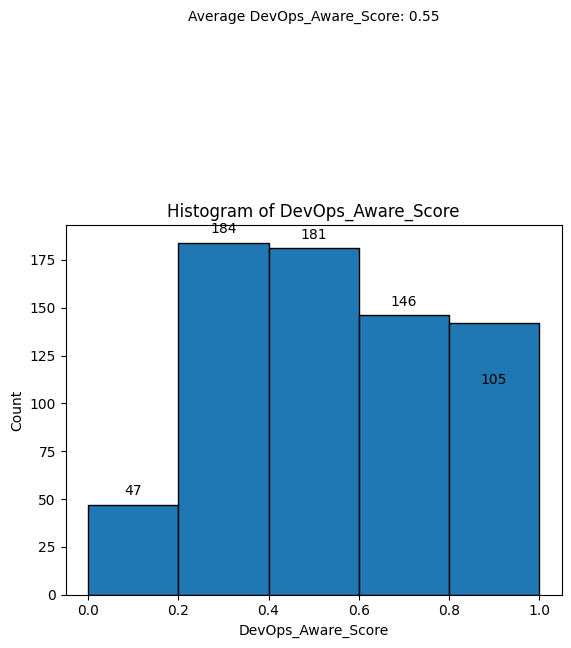

In [49]:
# create histogram
plt.hist(df['DevOps_Aware_Score'], bins=5, range=(0, 1), edgecolor='black')

# set labels and title
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')

# show count on top of each histogram
for i in range(5):
    count = len(df[(df['DevOps_Aware_Score'] >= i*0.2) & (df['DevOps_Aware_Score'] < (i+1)*0.2)])
    plt.text(i*0.2+0.1, count+5, str(count), ha='center')
    
# Print average DevOps_Aware_Score on top of the histogram
plt.text(0.5, 300, 'Average DevOps_Aware_Score: ' + str(round(df['DevOps_Aware_Score'].mean(), 2)), ha='center')

# show the plot
plt.show()

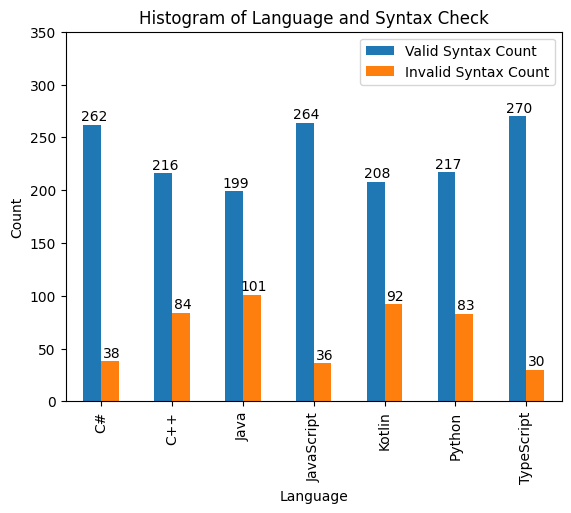

In [50]:
# Group the data by language and syntax check
grouped_data = df.groupby(['Language']).agg({'Syntax_Check_Count_Valid': 'sum', 'Syntax_Check_Count_Invalid': 'sum'})


# Plot histogram with multibar plot for each language and syntax check combination
ax = grouped_data.plot(kind='bar', stacked=False)

# Add count on top of each bar in the histogram, replace NaN or infinities with 0
for i, (lang, counts) in enumerate(grouped_data.items()):
    for j, count in enumerate(counts):
        if pd.isna(count) or count == float('inf') or count == float('-inf') or count != count:
            count = 0
        plt.text(i * 0.25 + j - 0.1, count + 1, str(int(count)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Histogram of Language and Syntax Check')

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Create legend with custom labels and adjust position
plt.legend(handles, ["Valid Syntax Count", "Invalid Syntax Count"], loc='upper right')
ax.set_ylim([0, grouped_data.max().max() + 80])
# Show the plot
plt.show()

In [51]:
# Calculate the total count of valid and invalid syntax for each language
total_counts = grouped_data['Syntax_Check_Count_Valid'] + grouped_data['Syntax_Check_Count_Invalid']

# Calculate the percentage of valid syntax for each language
valid_percentage = (grouped_data['Syntax_Check_Count_Valid'] / total_counts) * 100

# Print the percentage of valid syntax for each language
for language, percentage in valid_percentage.items():
    print(f"Percentage of valid syntax for {language}: {percentage:.2f}%")

overall_percentage = (grouped_data['Syntax_Check_Count_Valid'].sum() / total_counts.sum()) * 100

print(f"Overall percentage of valid syntax: {overall_percentage:.2f}%")

Percentage of valid syntax for C#: 87.33%
Percentage of valid syntax for C++: 72.00%
Percentage of valid syntax for Java: 66.33%
Percentage of valid syntax for JavaScript: 88.00%
Percentage of valid syntax for Kotlin: 69.33%
Percentage of valid syntax for Python: 72.33%
Percentage of valid syntax for TypeScript: 90.00%
Overall percentage of valid syntax: 77.90%


Average Exact_Match_Score 0.19
Average BLEU Score 0.39


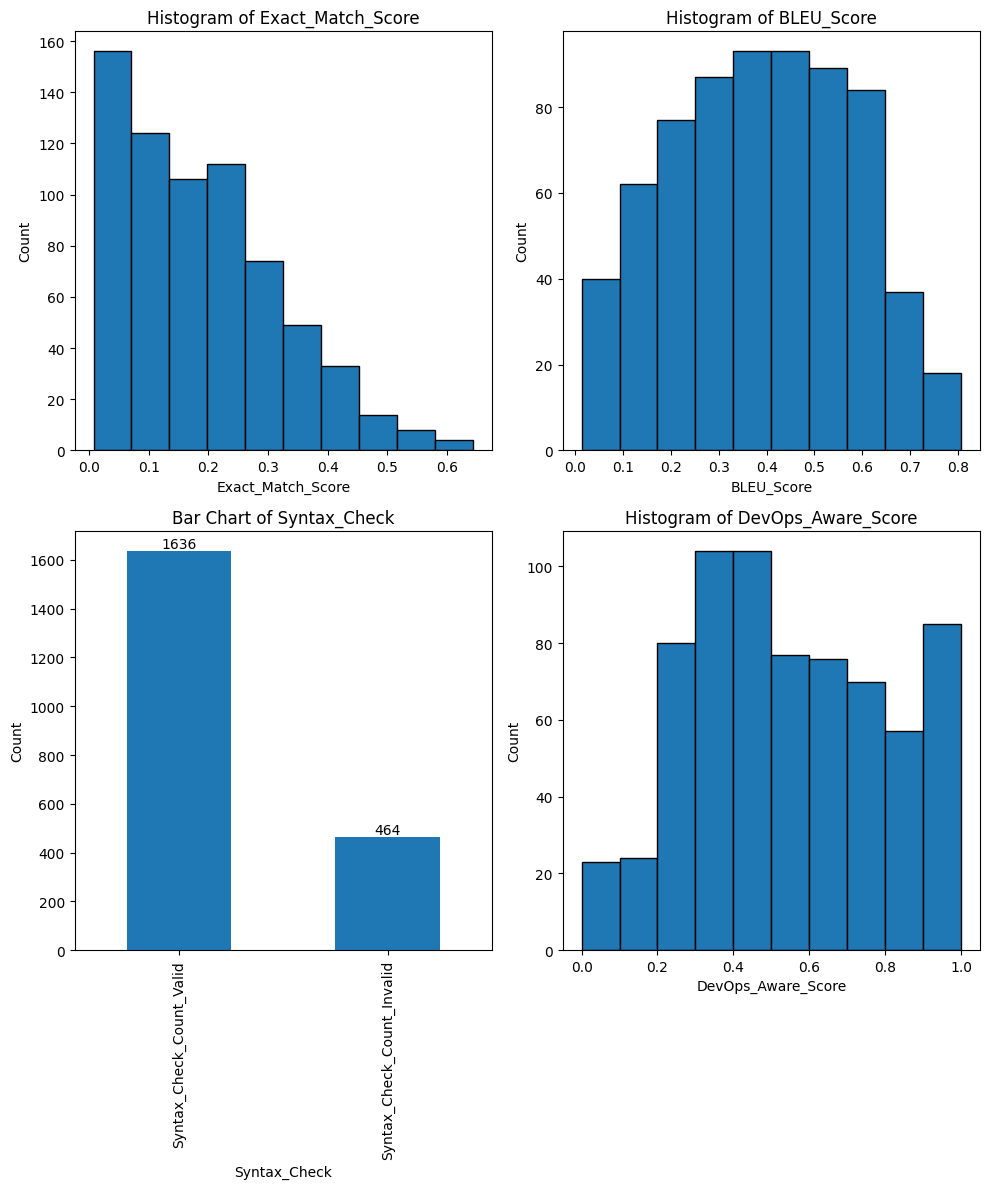

In [52]:
# Set a larger figure size
plt.figure(figsize=(10, 12))


print("Average Exact_Match_Score", round(df['Exact_Match_Score'].mean(), 2))
# Plot histogram of Exact_Match_Score
plt.subplot(2, 2, 1)
plt.hist(df['Exact_Match_Score'], bins=10, edgecolor='black')
plt.xlabel('Exact_Match_Score')
plt.ylabel('Count')
plt.title('Histogram of Exact_Match_Score')

print("Average BLEU Score", round(df['BLEU_Score'].mean(), 2))
# Plot histogram of BLEU_Score
plt.subplot(2, 2, 2)
plt.hist(df['BLEU_Score'], bins=10, edgecolor='black')
plt.xlabel('BLEU_Score')
plt.ylabel('Count')
plt.title('Histogram of BLEU_Score')


# Plot bar chart of Syntax_Check
plt.subplot(2, 2, 3)
syntax_check_counts = df[["Syntax_Check_Count_Valid", "Syntax_Check_Count_Invalid"]].sum()
syntax_check_counts.plot(kind='bar')
plt.xlabel('Syntax_Check')
plt.ylabel('Count')
plt.title('Bar Chart of Syntax_Check')

# Add count on top of each bar
for i in range(len(syntax_check_counts)):
    count = syntax_check_counts.iloc[i]
    plt.text(i, count, str(count), ha='center', va='bottom')

# Plot histogram of DevOps_Aware_Score
plt.subplot(2, 2, 4)
plt.hist(df['DevOps_Aware_Score'], bins=10, edgecolor='black')
plt.xlabel('DevOps_Aware_Score')
plt.ylabel('Count')
plt.title('Histogram of DevOps_Aware_Score')



# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1200x800 with 0 Axes>

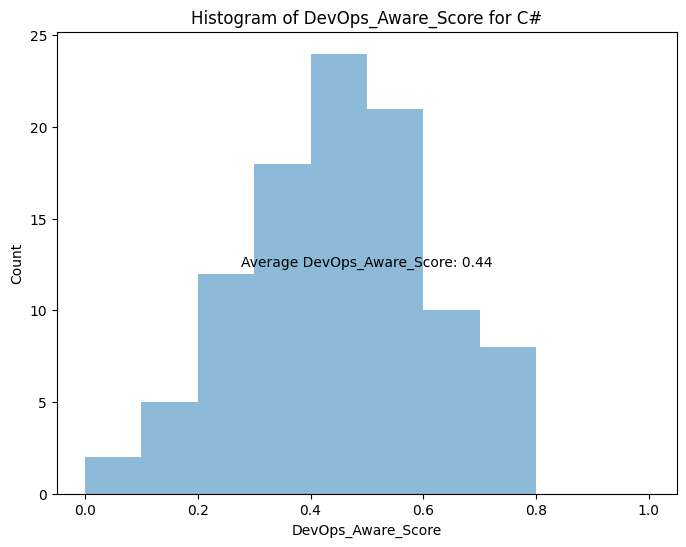

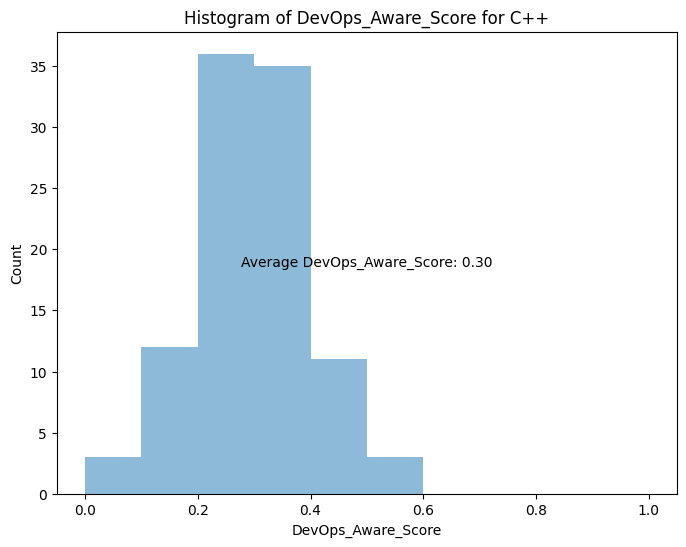

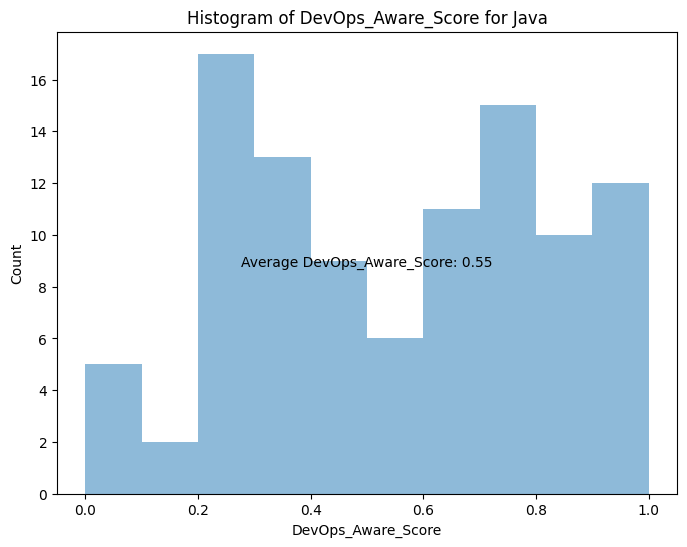

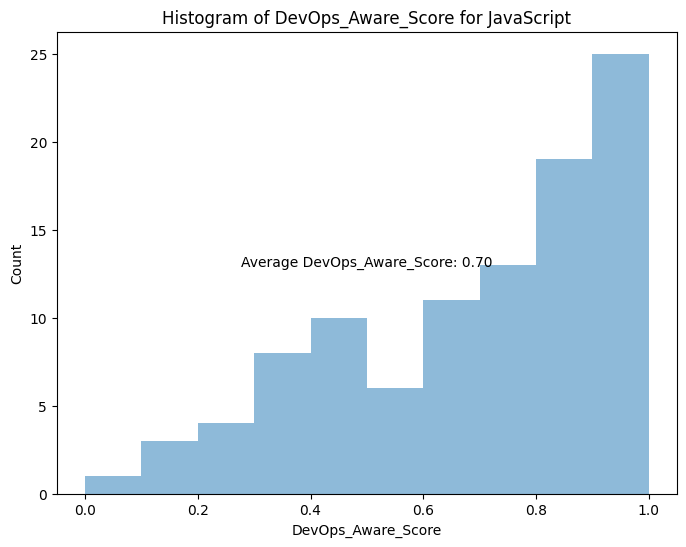

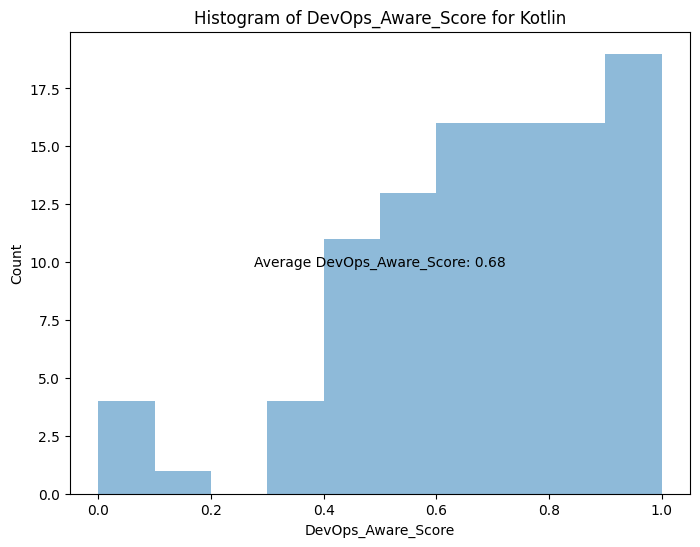

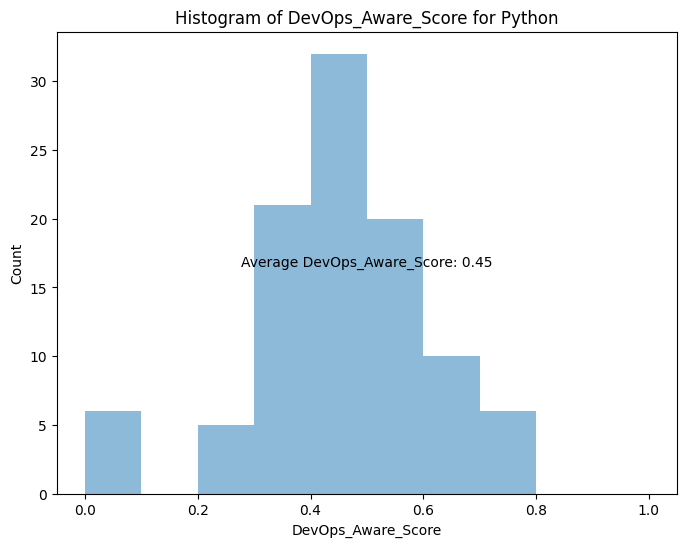

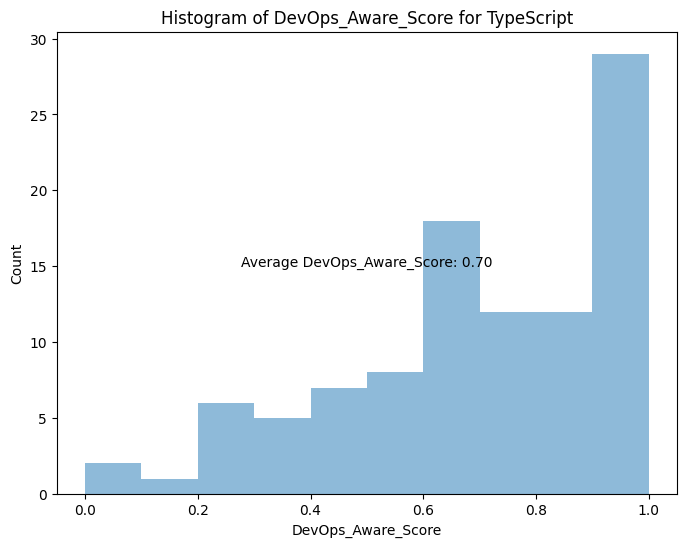

In [53]:
grouped_data = df.groupby('Language')

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Iterate over each group and create a separate plot for each language
for language, group in grouped_data:
    # Create a new figure for each language
    plt.figure(figsize=(8, 6))
    
    # Plot histogram for the current language
    plt.hist(group['DevOps_Aware_Score'], bins=10, range=(0, 1), alpha=0.5)
    
    # Print average DevOps_Aware_Score for the current language on the plot
    plt.text(0.5, 0.5, f'Average DevOps_Aware_Score: {group["DevOps_Aware_Score"].mean():.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    
    # Set labels and title for the current plot
    plt.xlabel('DevOps_Aware_Score')
    plt.ylabel('Count')
    plt.title(f'Histogram of DevOps_Aware_Score for {language}')
    
    # Show the plot for the current language
    plt.show()

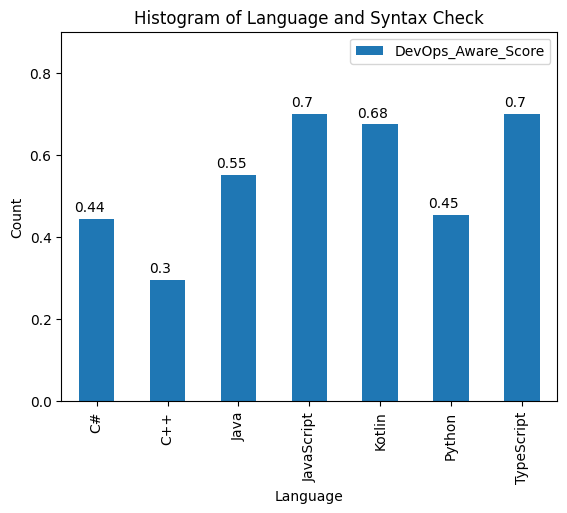

In [54]:
# Group the data by language and syntax check
grouped_data = df.groupby(['Language']).agg({'DevOps_Aware_Score': 'mean'})


# Plot histogram with multibar plot for each language and syntax check combination
ax = grouped_data.plot(kind='bar', stacked=False,)

# Add count on top of each bar in the histogram, replace NaN or infinities with 0
for i, (lang, score) in enumerate(grouped_data.items()):
    for j, score in enumerate(score):

        plt.text(i * 0.25 + j - 0.1, score + 0.01, str(round(score, 2)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Comparison of DevOps_Aware_Score for each language')
ax.set_ylim([0, grouped_data.max().max() + 0.2])
# Show the plot
plt.show()